## Configuracion de entorno

In [1]:
import numpy as np
import pandas as pd

# from copy import deepcopy
import warnings
import datetime as dt

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set_theme(color_codes=True)

from plotly.offline import plot,iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.express as px
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

import matplotlib as mpl
plt.style.use('seaborn') 
mpl.rcParams['font.family'] = 'serif'

import scipy.stats as stats

print('Setup complete')

Setup complete


## Importamos data

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Dermatology
derma_path = r'https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data'
derma_data = pd.read_csv(derma_path, header=0)

##### The aim is to determine the type of Eryhemato-Squamous Disease
##### Dermatosis Eritematoescamosas

## Analísis exploratorio de datos

In [3]:
print('Número de observaciones(filas): ',derma_data.shape[0])
print('Número de variables(columnas):  ',derma_data.shape[1])
print('Columnas',derma_data.keys())
# Deberían ser :derma_data.shape #<- (366, 35)

Número de observaciones(filas):  365
Número de variables(columnas):   35
Columnas Index(['2', '2.1', '0', '3', '0.1', '0.2', '0.3', '0.4', '1', '0.5', '0.6',
       '0.7', '0.8', '0.9', '0.10', '3.1', '2.2', '0.11', '0.12', '0.13',
       '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '3.2', '0.21',
       '0.22', '0.23', '1.1', '0.24', '55', '2.3'],
      dtype='object')


En la descripción de la información no se menciona que haya una columna 35,
describe 34. Sin embargo, sí habla de los tipos de clases de enfermedades eritematoescamosas
..." psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis,
and pityriasis rubra pilaris.", además en el archivo de "Data Set Description" menciona el código de clases, 
el nombre de la clase y su frecuencia en el dataset.

##### Se corroboran si la última columna pertenenece a la clases y el número de instancias

In [4]:
derma_data['2.3'].value_counts().sort_values(ascending=False)

1    112
3     72
2     60
5     52
4     49
6     20
Name: 2.3, dtype: int64

#### Se agrega el nombre de las columnas

In [5]:
derma_data = pd.read_csv(derma_path, names=['erythema','scaling','definite_borders','itching','koebner_phenomenon',\
                                            'polygonal_papules','follicular_papules','oral_mucosal_involvement',\
                                            'knee_elbow_involvement','scalp_involvement','family_history',\
                                            'melanin_incontinence','eosinophils_in_the_infiltrate','PNL_infiltrate',\
                                            'fibrosis_ of_the_papillary_dermis','exocytosis','acanthosis','hyperkeratosis',\
                                            'parakeratosis','clubbing_of_the_rete_ridges','elongation_of_the_rete_ridges',\
                                            'thinning_of_the_suprapapillary_epidermis','spongiform_pustule','munro_microabcess',\
                                            'focal_hypergranulosis','disappearance_of_the_granular_layer','vacuolisation_and_damage_of_basal_layer',\
                                            'spongiosis','saw-tooth_appearance_of_retes','follicular_horn_plug','perifollicular_parakeratosis',\
                                            'inflammatory_monoluclear_inflitrate','band-like_infiltrate','Age','class_code'
                                            ]
                        )

In [6]:
derma_data.shape #<- (366, 35)

(366, 35)

### Tipo de datos

In [7]:
# derma_data.info()
derma_data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_elbow_involvement                       int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_ of_the_papillary_dermis            int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [8]:
derma_data["Age"].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

En la columna edad se encuentra un tipo "objeto", cuando en el dataset se describe que debe ser lineal. Deberíamos esperar un int64.
La columna "Age" representa un objeto porque tiene valores "?".

In [9]:
derma_data[derma_data['Age']=='?']
# Son las filas con el valor desconocido para Age 33:36,262:265

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_code
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


Se sustituye ese simbolo por el promedio de las edades de los pacientes.

In [10]:
mean_age = int(derma_data[derma_data['Age'] != '?']['Age'].astype(int).mean())
# derma_data['Age'].replace('?',mean_age)[262:266]
derma_data['Age']=derma_data['Age'].replace('?',mean_age)
# derma_data['Age'].value_counts()

In [11]:
derma_data['Age'][262:266]

262    36
263    36
264    36
265    36
Name: Age, dtype: object

El método replace() trabaja con cadenas por lo que debemos convertir el valor de la columna Age por un tipo int

In [12]:
# derma_data.dtypes[34]
derma_data['Age']=derma_data['Age'].astype(int)
derma_data.dtypes[34]

dtype('int64')

Obtenemos una muestra aleatoria del conjunto de datos

In [13]:
# derma_data.head()
# derma_data.tail()
muestra = int(derma_data.shape[0]*.40)
derma_data.sample(10,random_state=muestra)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_code
91,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,43,2
324,2,2,3,0,1,0,0,0,3,0,...,1,0,0,0,0,0,2,0,53,1
215,2,3,2,3,3,2,0,2,0,0,...,2,2,1,2,0,0,2,2,27,3
331,1,1,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,3,0,22,4
286,2,3,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,45,2
133,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,29,5
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
92,1,1,1,3,0,0,1,0,0,0,...,0,0,1,0,0,0,2,0,30,5
304,3,1,2,1,0,0,0,0,2,3,...,2,0,0,0,0,0,2,0,17,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### Conteo de valores missings

In [14]:
# derma_data.isnull()
# derma_data.isnull().sum()
derma_data.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_elbow_involvement                      0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_ of_the_papillary_dermis           0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Se agrega clase para cada codigo de clase

In [15]:
# len([i for i in derma_data['class_code'] if i==2])
# len([i for i in derma_data['class_code'] if i==1])
clase = []
for i in derma_data['class_code']:
    if(i == 1):
        clase.append('psoriasis')
    elif(i==2):
        clase.append('seboreic dermatitis')
    elif(i==3):
        clase.append('lichen planus')
    elif(i==4):
        clase.append('pityriasis rosea')
    elif(i==5):
        clase.append('cronic dermatitis')
    else:
        clase.append('pityriasis rubra pilaris')

derma_data['clase']= clase

### Tabla de varaibles y clasificaciones de Enfermedades Eritematoescamosas

In [16]:
# list(derma_data.columns[0:11]) 
# list(derma_data.columns[[33]])
# list(derma_data.columns[11:33])
# list(derma_data["clase"].value_counts().keys())
# len(list(derma_data.columns[11:33])) #<- 21
clinical_features = pd.Series(list(derma_data.columns[0:11]) + list(derma_data.columns[[33]]))
hispathological_features =pd.Series(derma_data.columns[11:33])
class_ery_squa_dis = pd.Series(derma_data["clase"].value_counts().keys())
uci_erythemato_squamous_diseases = pd.DataFrame({ "clinical_features":clinical_features,
                                                 "hispathological_features":hispathological_features,
                                                 "class_ery_squa_dis":class_ery_squa_dis
                                               })
uci_erythemato_squamous_diseases = uci_erythemato_squamous_diseases.fillna("")
uci_erythemato_squamous_diseases

,clinical_features,hispathological_features,class_ery_squa_dis
0,erythema,melanin_incontinence,psoriasis
1,scaling,eosinophils_in_the_infiltrate,lichen planus
2,definite_borders,PNL_infiltrate,seboreic dermatitis
3,itching,fibrosis_ of_the_papillary_dermis,cronic dermatitis
4,koebner_phenomenon,exocytosis,pityriasis rosea
5,polygonal_papules,acanthosis,pityriasis rubra pilaris
6,follicular_papules,hyperkeratosis,
7,oral_mucosal_involvement,parakeratosis,
8,knee_elbow_involvement,clubbing_of_the_rete_ridges,
9,scalp_involvement,elongation_of_the_rete_ridges,


### Resumen estadístico

In [17]:
derma_data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_code
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.289617,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.155749,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


A exepción de "Age", la mayoría de las variables son de tipo categorícas. Para la edad el mínimo de años fue 0; lo que tomaremos como un paciente recien nacido

In [18]:
derma_data.Age.unique()
# np.sort(derma_data.Age.unique())
# pd.Series(derma_data.Age.unique()).sort_values()

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, 36, 15, 46, 62, 35, 48, 12, 52, 60, 32,
       19, 29, 25, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67,
       56, 53, 24, 58, 49, 63, 68,  9, 75])

### Visualizaciones

Visualizar el número de clases de enfermedades eritematoescamosas

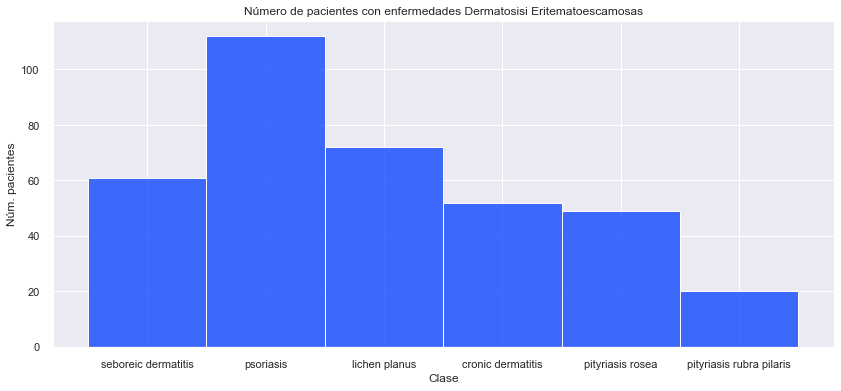

In [19]:
plt.figure(figsize=(14,6))
sns.set_theme(style ="darkgrid",palette="bright")
plt.title('Número de pacientes con enfermedades Dermatosisi Eritematoescamosas')
plt.xlabel('Clase')
plt.ylabel('Núm. pacientes')
sns.histplot(derma_data['clase'])
plt.show()

Se agrupa por clase, edad y se busca el total de pacientes para este grupo de estudio.

In [20]:
der_clase_edad_total = derma_data.groupby(['clase','Age']).size()
der_clase_edad_total = der_clase_edad_total.reset_index()
der_clase_edad_total.columns =['clase','Age','Total']
der_clase_edad_total

,clase,Age,Total
0,cronic dermatitis,8,1
1,cronic dermatitis,16,1
2,cronic dermatitis,17,3
3,cronic dermatitis,18,3
4,cronic dermatitis,19,2
...,...,...,...
171,seboreic dermatitis,51,2
172,seboreic dermatitis,52,3
173,seboreic dermatitis,55,4
174,seboreic dermatitis,61,1


#### Observamos la clase que tuvo el mayor número de pacientes  por edad.

In [21]:
# Mayor cantidad de pacientes por enfermedad y edad
der_clase_edad_total[der_clase_edad_total.iloc[:,0]=="psoriasis"].sort_values(by="Total", ascending=False)
# der_clase_edad_total[der_clase_edad_total.iloc[:,0]=="lichen planus"].sort_values(by="Total", ascending=False)
# der_clase_edad_total[der_clase_edad_total.iloc[:,0]=="seboreic dermatitis"].sort_values(by="Total", ascending=False)

# Menor cantidad de pacientes por enfermedad y edad
# der_clase_edad_total[der_clase_edad_total.iloc[:,0]=="pityriasis rubra pilaris"].sort_values(by="Total", ascending=False)

,clase,Age,Total
135,psoriasis,55,7
139,psoriasis,60,6
120,psoriasis,36,6
117,psoriasis,33,6
112,psoriasis,27,6
131,psoriasis,50,5
125,psoriasis,42,4
123,psoriasis,40,4
115,psoriasis,30,4
141,psoriasis,62,4


<Figure size 1080x576 with 0 Axes>

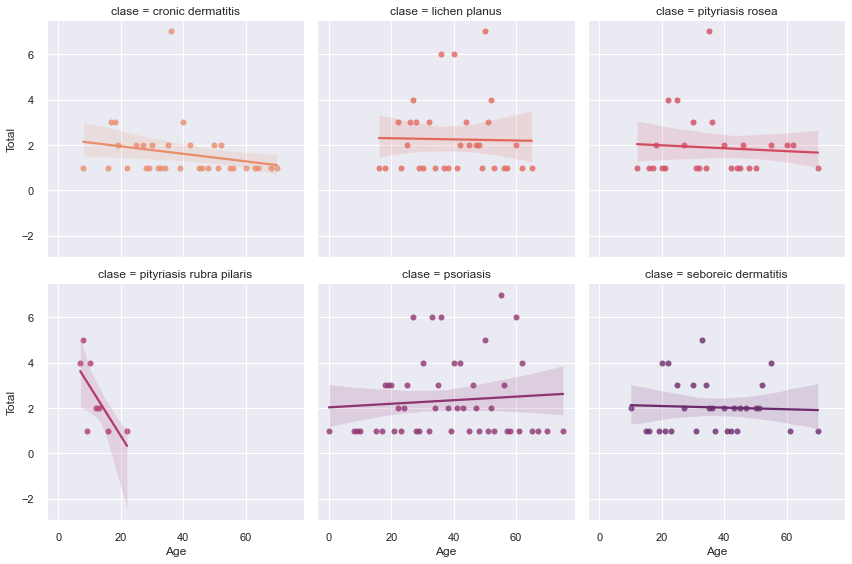

In [22]:
plt.figure(figsize=(15,8))
sns.lmplot(x = 'Age', y = 'Total', hue = 'clase',
           col='clase', data = der_clase_edad_total,
           col_wrap=3,height=4, palette="flare")
plt.show()

## Estudio de la relación de variables

### Correlación

In [23]:
derma_cor = derma_data.corr(method='pearson')
derma_cor

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_code
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.004688,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016162,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.136404,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.047196,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080392,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095831,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370886,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110315,0.055805
knee_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077821,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.036523,-0.533208


Se observa la relación que tienen las variables clínicas e histopatológicas por el nivel de presencia en cada paciente.

<AxesSubplot:>

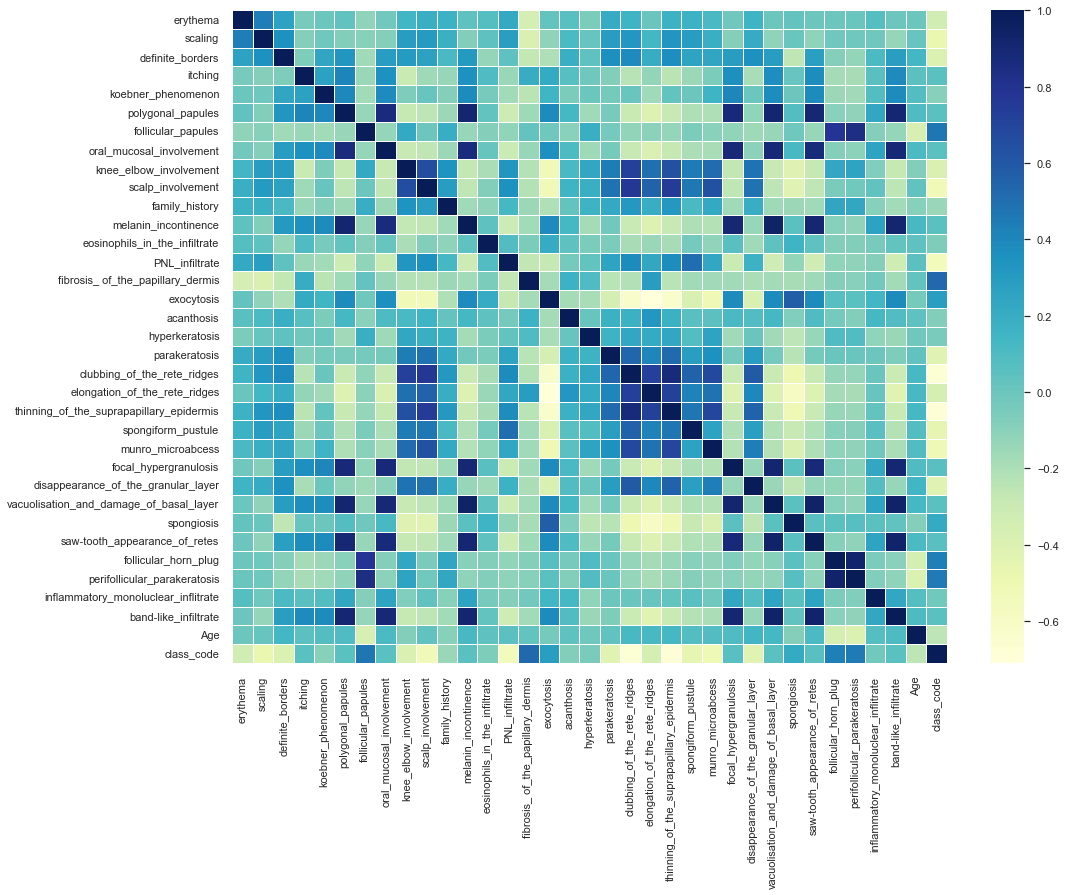

In [24]:
plt.figure(figsize=(16,12))
# sns.heatmap(data = derma_cor, annot=True)
sns.heatmap(data = derma_cor, linewidths=.5, cmap="YlGnBu")

Relación alta

In [72]:
# derma_data.loc[:,['polygonal_papules','melanin_incontinence']][derma_data['polygonal_papules'] == derma_data['melanin_incontinence']]

derma_data.loc[:,['polygonal_papules','melanin_incontinence']][derma_data['polygonal_papules'] == derma_data['melanin_incontinence']].\
                value_counts().reset_index(name='total')
# derma_data.loc[:,['oral_mucosal_involvement','focal_hypergranulosis']][derma_data['oral_mucosal_involvement'] == derma_data['focal_hypergranulosis']].\
#                     value_counts().reset_index(name='total')
# derma_data.loc[:,['knee_elbow_involvement','clubbing_of_the_rete_ridges']][derma_data['knee_elbow_involvement'] == derma_data['clubbing_of_the_rete_ridges']].\
#                     value_counts().reset_index(name='total')
# derma_data.loc[:,['follicular_papules','follicular_horn_plug']][derma_data['follicular_papules'] == derma_data['follicular_horn_plug']].\
#                     value_counts().reset_index(name='total')
# derma_data.loc[:,['follicular_papules','band-like_infiltrate']][derma_data['follicular_papules'] == derma_data["band-like_infiltrate"]].\
#                         value_counts().reset_index(name='total')

,polygonal_papules,melanin_incontinence,total
0,0,0,294
1,2,2,25
2,3,3,5


Relación baja

In [67]:
# derma_data.loc[:,['erythema','fibrosis_ of_the_papillary_dermis']][derma_data['erythema'] == derma_data['fibrosis_ of_the_papillary_dermis']].\
#                 value_counts().reset_index(name='total')
# derma_data.loc[:,['scaling','fibrosis_ of_the_papillary_dermis']][derma_data['scaling'] == derma_data['fibrosis_ of_the_papillary_dermis']].\
#                 value_counts().reset_index(name='total')
# derma_data.loc[:,['polygonal_papules','elongation_of_the_rete_ridges']][derma_data['polygonal_papules'] == derma_data['elongation_of_the_rete_ridges']].\
#                 value_counts().reset_index(name='total')
# derma_data.loc[:,['scalp_involvement','spongiosis']][derma_data['scalp_involvement'] == derma_data['spongiosis']].\
#                 value_counts().reset_index(name='total')

,scalp_involvement,spongiosis,total
0,0,0,108
1,1,1,2
2,2,2,2


Demostrar las variables que no están relacionadas

### Asociación de variables
Presencia de una variable clínca o histopatologícas

In [26]:
# derma_data[derma_data.iloc[:,3]!=0]
def frec_rel ():
    frec = []
    clases = pd.Series(derma_data["clase"].value_counts().keys())
    for i in range(0,6):
        for j in range(0,33):
            frec.append(len(derma_data[(derma_data.iloc[:,j]!=0) & (derma_data.clase==clases[i])]))
#             print(j,clases[i])
    df = pd.DataFrame(frec,columns = ["frec"])
    return df
frec_rel()
# type(frec_rel())

,frec
0,111
1,112
2,112
3,57
4,49
...,...
193,0
194,19
195,20
196,19


In [27]:
profits = []
for i in range (0,6):
    for j in derma_data.keys()[0:33]:
        profits.append(j)
profits
df = frec_rel().assign(features=profits)
clases = ["psoriasis","lichen planus","seboreic dermatitis",
           "cronic dermatitis","pityriasis rosea","pityriasis rubra pilaris"]
df['clase'] = np.repeat(clases,33)
# df[df['clase']=="cronic dermatitis"]
# df.groupby(['clase','features'])['frec'].apply(list)
df.groupby(['clase','features']).sum()

frec
clase               features                                      
cronic dermatitis   PNL_infiltrate                               0
                    acanthosis                                  52
                    band-like_infiltrate                         1
                    clubbing_of_the_rete_ridges                  3
                    definite_borders                            29
...                                                            ...
seboreic dermatitis scalp_involvement                            5
                    spongiform_pustule                           8
                    spongiosis                                  57
                    thinning_of_the_suprapapillary_epidermis     1
                    vacuolisation_and_damage_of_basal_layer      0

[198 rows x 1 columns]

In [28]:
tbl_fre =df.groupby(['features','clase']).sum()
tbl_fre
# tbl_fre = tbl_fre.reset_index()
# tbl_fre
# tbl_fre.sort_values(by=['clase'])
# tbl_fre[tbl_fre['clase']=='psoriasis'].iloc[:,[0,2]]

frec
features                                clase                         
PNL_infiltrate                          cronic dermatitis            0
                                        lichen planus                0
                                        pityriasis rosea             6
                                        pityriasis rubra pilaris     3
                                        psoriasis                   78
...                                                                ...
vacuolisation_and_damage_of_basal_layer lichen planus               71
                                        pityriasis rosea             0
                                        pityriasis rubra pilaris     0
                                        psoriasis                    1
                                        seboreic dermatitis          0

[198 rows x 1 columns]

### Tabla de frecuencias relativas

In [29]:
# derma_data['clase'].unique()
# df[df['clase']=="psoriasis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
# df[df['clase']=="lichen planus"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
# df[df['clase']=="seboreic dermatitis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
# df[df['clase']=="cronic dermatitis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
# df[df['clase']=="pityriasis rosea"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
# df[df['clase']=="pityriasis rubra pilaris"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True)
df2 = pd.DataFrame(index=derma_data.keys()[0:33].sort_values(),columns=['psoriasis','lichen_planus','seboreic_dermatitis',
                            'cronic_dermatitis','pityriasis_rosea','pityriasis_rubra_pilaris'])
a = list(df[df['clase']=="psoriasis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
b = list(df[df['clase']=="lichen planus"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
c = list(df[df['clase']=="seboreic dermatitis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
d = list(df[df['clase']=="cronic dermatitis"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
e = list(df[df['clase']=="pityriasis rosea"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
f = list(df[df['clase']=="pityriasis rubra pilaris"].groupby(['clase','features']).sum().sort_values(by = 'features', ascending=True).reset_index().iloc[:,2])
df2['psoriasis'] = a
df2['lichen_planus'] = b
df2['seboreic_dermatitis'] = c
df2['cronic_dermatitis'] = d
df2['pityriasis_rosea'] = e
df2['pityriasis_rubra_pilaris'] = f
df2

,psoriasis,lichen_planus,seboreic_dermatitis,cronic_dermatitis,pityriasis_rosea,pityriasis_rubra_pilaris
PNL_infiltrate,78,0,44,0,6,3
acanthosis,111,71,57,52,45,20
band-like_infiltrate,2,72,1,1,0,1
clubbing_of_the_rete_ridges,109,0,0,3,0,2
definite_borders,112,71,40,29,40,15
disappearance_of_the_granular_layer,66,9,0,0,18,0
elongation_of_the_rete_ridges,112,0,7,47,0,2
eosinophils_in_the_infiltrate,3,10,22,4,3,0
erythema,111,71,61,50,49,20
exocytosis,19,71,60,32,48,18


### Coeficiente de Cramer

In [30]:
# https://www.statology.org/cramers-v-in-python/
tbl_frec = np.array(df2)
chi = stats.chi2_contingency(tbl_frec,correction=False)[0]
n = tbl_frec.sum()
# n = np.sum(tbl_frec)
minNum = min(tbl_frec.shape)-1
v = np.round(np.sqrt(chi/(n*(minNum))),2)
v #<-0.44

0.44

##### La relación entre  un tipo de Dermatosis Eritematoescamosas y tener alguna de las variables clínicas o histopatológicas es relativamente mediana.

Observando una de las clases con mayor frecuencia.

In [31]:
df2 = df2.sort_values(by='psoriasis', ascending=False)
df2

,psoriasis,lichen_planus,seboreic_dermatitis,cronic_dermatitis,pityriasis_rosea,pityriasis_rubra_pilaris
definite_borders,112,71,40,29,40,15
elongation_of_the_rete_ridges,112,0,7,47,0,2
scaling,112,70,61,46,49,20
acanthosis,111,71,57,52,45,20
erythema,111,71,61,50,49,20
parakeratosis,111,57,37,25,32,18
clubbing_of_the_rete_ridges,109,0,0,3,0,2
thinning_of_the_suprapapillary_epidermis,108,0,1,1,0,0
inflammatory_monoluclear_inflitrate,107,71,57,51,48,19
scalp_involvement,89,2,5,0,0,6


In [32]:
df2["total"]=df2.sum(axis=1)
df2 = df2.sort_values(by='total', ascending=False)
df2

,psoriasis,lichen_planus,seboreic_dermatitis,cronic_dermatitis,pityriasis_rosea,pityriasis_rubra_pilaris,total
erythema,111,71,61,50,49,20,362
scaling,112,70,61,46,49,20,358
acanthosis,111,71,57,52,45,20,356
inflammatory_monoluclear_inflitrate,107,71,57,51,48,19,353
definite_borders,112,71,40,29,40,15,307
parakeratosis,111,57,37,25,32,18,280
exocytosis,19,71,60,32,48,18,248
itching,57,70,52,44,16,9,248
elongation_of_the_rete_ridges,112,0,7,47,0,2,168
spongiosis,0,37,57,12,47,14,167


In [35]:
df2 = df2.iloc[0:9,:]
df2

,psoriasis,lichen_planus,seboreic_dermatitis,cronic_dermatitis,pityriasis_rosea,pityriasis_rubra_pilaris,total
erythema,111,71,61,50,49,20,362
scaling,112,70,61,46,49,20,358
acanthosis,111,71,57,52,45,20,356
inflammatory_monoluclear_inflitrate,107,71,57,51,48,19,353
definite_borders,112,71,40,29,40,15,307
parakeratosis,111,57,37,25,32,18,280
exocytosis,19,71,60,32,48,18,248
itching,57,70,52,44,16,9,248
elongation_of_the_rete_ridges,112,0,7,47,0,2,168


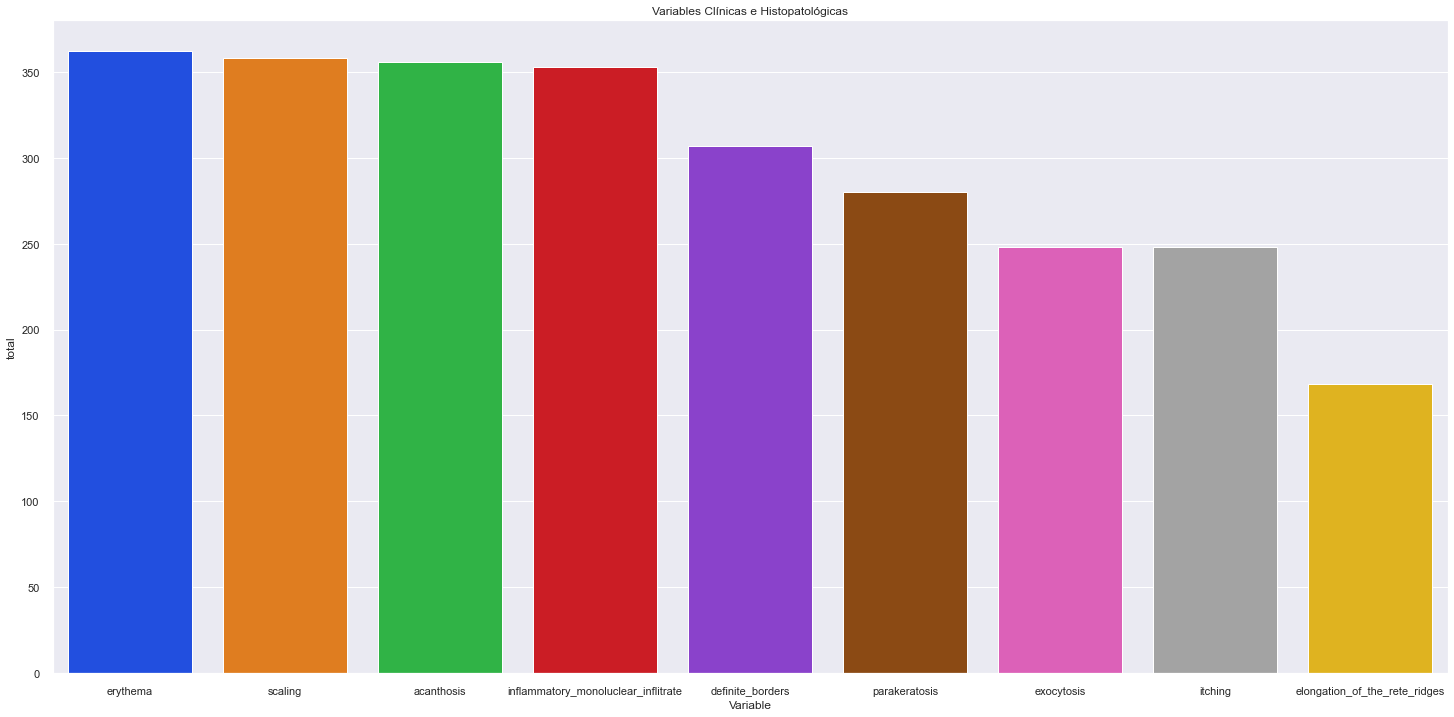

In [36]:
plt.figure(figsize=(25,12))
plt.title('Variables Clínicas e Histopatológicas')
plt.xlabel('Variable')
plt.ylabel('Peso')
sns.barplot(x=df2.index,y=df2['total'])
plt.show()

### Analizando por el peso de cada variable respecto al nivel de presencia.

#### Hispathological_features

In [37]:
def recorre():
    a = []
    for x in range(11,33):
        a.append(derma_data.iloc[:,x].value_counts())
    return a   
pesos_hispathological = pd.DataFrame(recorre())
pesos_hispathological[0] = pesos_hispathological[0].astype(int)
pesos_hispathological[1] = pesos_hispathological[1].astype(int)
pesos_hispathological[2] = pesos_hispathological[2].astype(int)
pesos_hispathological[3] = pesos_hispathological[3].fillna(0).astype(int)
pesos_hispathological = pesos_hispathological.sort_values(by=[3], ascending=False)
col_names = [3,2,1,0]
pesos_hispathological = pesos_hispathological.reindex(columns=col_names)
pesos_hispathological

,3,2,1,0
acanthosis,75,210,71,10
inflammatory_monoluclear_inflitrate,62,206,85,13
exocytosis,62,129,57,118
band-like_infiltrate,52,22,3,289
elongation_of_the_rete_ridges,50,95,23,198
spongiosis,43,96,28,199
clubbing_of_the_rete_ridges,34,61,19,252
thinning_of_the_suprapapillary_epidermis,31,60,19,256
parakeratosis,30,132,118,86
saw-tooth_appearance_of_retes,27,40,5,294


#### Clinical_features

In [38]:
def recorre():
    a = []
    for x in range(0,11):
        a.append(derma_data.iloc[:,x].value_counts())
    return a   
pesos_clinical = pd.DataFrame(recorre())
pesos_clinical[0] = pesos_clinical[0].astype(int)
pesos_clinical[1] = pesos_clinical[1].astype(int)
pesos_clinical[2] = pesos_clinical[2].fillna(0).astype(int)
pesos_clinical[3] = pesos_clinical[3].fillna(0).astype(int)
pesos_clinical = pesos_clinical.sort_values(by=[3], ascending=False)
col_names = [3,2,1,0]
pesos_clinical = pesos_clinical.reindex(columns=col_names)
pesos_clinical

,3,2,1,0
erythema,90,215,57,4
itching,76,100,72,118
scaling,52,195,111,8
definite_borders,46,168,93,59
polygonal_papules,27,41,1,297
knee_elbow_involvement,23,64,28,251
koebner_phenomenon,18,54,70,224
scalp_involvement,16,56,30,264
oral_mucosal_involvement,13,45,9,299
follicular_papules,6,16,11,333


##### Se ordena por un nivel de presencia alto.

In [39]:
features = pd.concat([pesos_clinical,pesos_hispathological])
features = features.T
def porcentaje():
    b=[]
    for i in range(0,33):
        b.append((features.iloc[:,i]/366)*100)
    return b
features_percent = pd.DataFrame(porcentaje())
features_percent = features_percent.sort_values(by=[3],ascending=False)
features_percent

,3,2,1,0
erythema,24.590164,58.743169,15.573770,1.092896
itching,20.765027,27.322404,19.672131,32.240437
acanthosis,20.491803,57.377049,19.398907,2.732240
exocytosis,16.939891,35.245902,15.573770,32.240437
inflammatory_monoluclear_inflitrate,16.939891,56.284153,23.224044,3.551913
scaling,14.207650,53.278689,30.327869,2.185792
band-like_infiltrate,14.207650,6.010929,0.819672,78.961749
elongation_of_the_rete_ridges,13.661202,25.956284,6.284153,54.098361
definite_borders,12.568306,45.901639,25.409836,16.120219
spongiosis,11.748634,26.229508,7.650273,54.371585


Nos enfocamos en las primeras 10 variables

In [40]:
features_percent.iloc[0:10,:]

,3,2,1,0
erythema,24.590164,58.743169,15.573770,1.092896
itching,20.765027,27.322404,19.672131,32.240437
acanthosis,20.491803,57.377049,19.398907,2.732240
exocytosis,16.939891,35.245902,15.573770,32.240437
inflammatory_monoluclear_inflitrate,16.939891,56.284153,23.224044,3.551913
scaling,14.207650,53.278689,30.327869,2.185792
band-like_infiltrate,14.207650,6.010929,0.819672,78.961749
elongation_of_the_rete_ridges,13.661202,25.956284,6.284153,54.098361
definite_borders,12.568306,45.901639,25.409836,16.120219
spongiosis,11.748634,26.229508,7.650273,54.371585


## Nos apoyamos de la visualización con gráficas de pastel

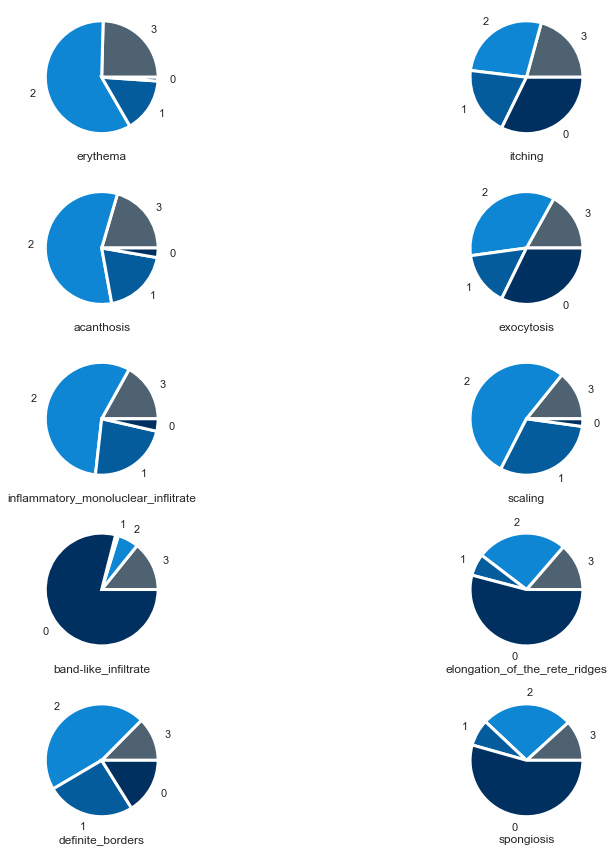

In [41]:
fig, ((ax,bx),(cx,dx),(ex,fx),(gx,hx),(ix,jx)) = plt.subplots(5,2,figsize=(16,12))
# fig, (ax,bx,cx,dx,ex,fx,gx,hx,ix,jx) = plt.subplots(10,1,figsize=(16,12))
colors = ['#4F6272', '#0E86D4', '#055C9D', '#003060']

ax.pie(features_percent.iloc[0,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
ax.set_xlabel(features_percent.index[0],size=12)

bx.pie(features_percent.iloc[1,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
bx.set_xlabel(features_percent.index[1],size=12)

cx.pie(features_percent.iloc[2,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
cx.set_xlabel(features_percent.index[2],size=12)

dx.pie(features_percent.iloc[3,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
dx.set_xlabel(features_percent.index[3],size=12)

ex.pie(features_percent.iloc[4,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
ex.set_xlabel(features_percent.index[4],size=12)

fx.pie(features_percent.iloc[5,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
fx.set_xlabel(features_percent.index[5],size=12)

gx.pie(features_percent.iloc[6,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
gx.set_xlabel(features_percent.index[6],size=12)

hx.pie(features_percent.iloc[7,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
hx.set_xlabel(features_percent.index[7],size=12)

ix.pie(features_percent.iloc[8,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
ix.set_xlabel(features_percent.index[8],size=12)

jx.pie(features_percent.iloc[9,:4],labeldistance=1.20,labels=list(features_percent.keys()),
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors) 
jx.set_xlabel(features_percent.index[9],size=12)

plt.tight_layout()
plt.show()

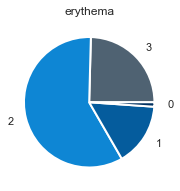

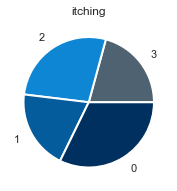

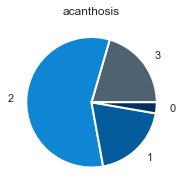

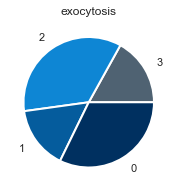

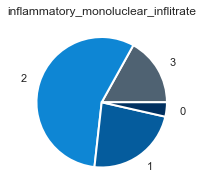

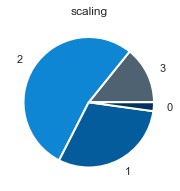

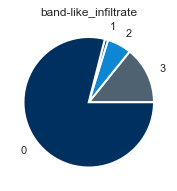

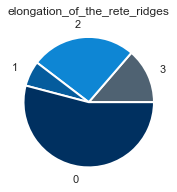

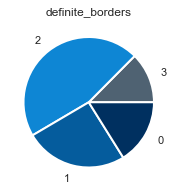

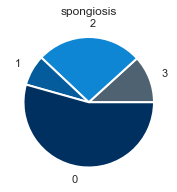

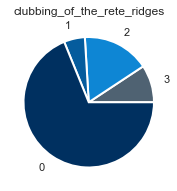

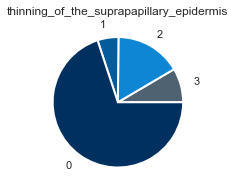

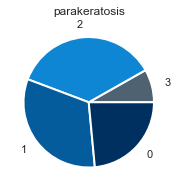

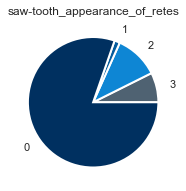

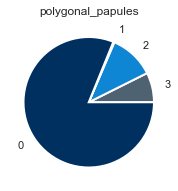

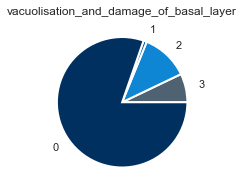

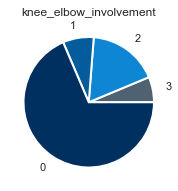

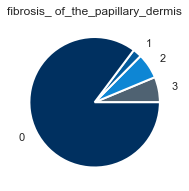

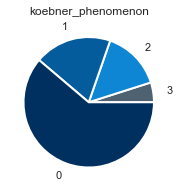

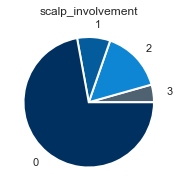

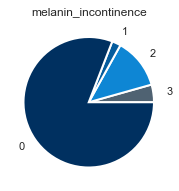

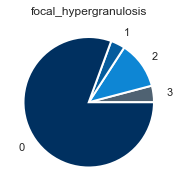

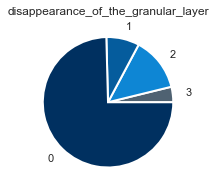

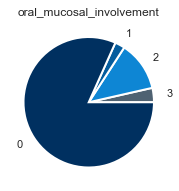

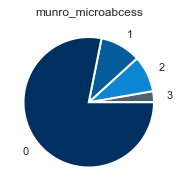

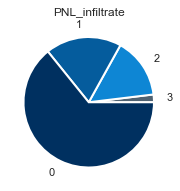

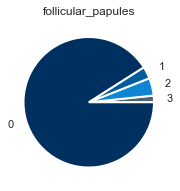

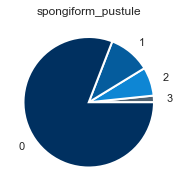

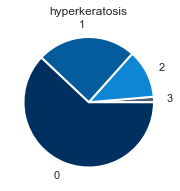

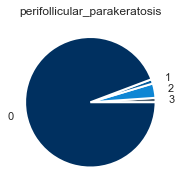

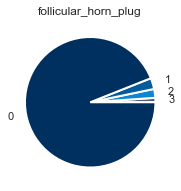

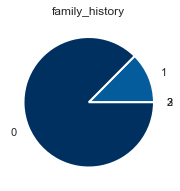

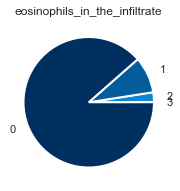

In [42]:
def pastel():
    x=32
    for i in range(0,x+1) :
        fig, ax = plt.subplots(figsize=(8,3))
        colors = ['#4F6272', '#0E86D4', '#055C9D', '#003060']
        ax.pie(features_percent.iloc[i,:4],labeldistance=1.20,labels=list(features_percent.keys()),
          wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors=colors)
        ax.set_title(features_percent.index[i],size=12)
pastel()

##### Ordenar por alto porcentaje en el nivel de presencia medio (2)

In [43]:
features = pd.concat([pesos_clinical,pesos_hispathological])
features = features.T
# features['weight']= ["alto","medio","medio","bajo"]
def porcentaje():
    b=[]
    for i in range(0,33):
        b.append((features.iloc[:,i]/366)*100)
    return b
features_percent2 = pd.DataFrame(porcentaje())
features_percent2 = features_percent.sort_values(by=[2],ascending=False)
features_percent2.iloc[0:10,:]

,3,2,1,0
erythema,24.590164,58.743169,15.573770,1.092896
acanthosis,20.491803,57.377049,19.398907,2.732240
inflammatory_monoluclear_inflitrate,16.939891,56.284153,23.224044,3.551913
scaling,14.207650,53.278689,30.327869,2.185792
definite_borders,12.568306,45.901639,25.409836,16.120219
parakeratosis,8.196721,36.065574,32.240437,23.497268
exocytosis,16.939891,35.245902,15.573770,32.240437
itching,20.765027,27.322404,19.672131,32.240437
spongiosis,11.748634,26.229508,7.650273,54.371585
elongation_of_the_rete_ridges,13.661202,25.956284,6.284153,54.098361


#### Se agrupa por clase y edad para las variables clínicas y histopatológicas con mayor peso y nivel de presencia.

In [44]:
der_hight_weight = derma_data.loc[:,["erythema","itching","acanthosis","exocytosis",
                                     "inflammatory_monoluclear_inflitrate","scaling",
                                     "band-like_infiltrate","elongation_of_the_rete_ridges",
                                     "definite_borders","spongiosis","clase","Age"]]

der_hight_weight
# der_hight_weight.groupby("clase").sum().sort_values(by='erythema', ascending=False)
# der_hight_weight.groupby(["clase","Age"]).sum().sort_values(by='Age', ascending=False)
der_hight_weight.groupby(["clase","Age"]).sum()

erythema  itching  acanthosis  exocytosis  \
clase               Age                                              
cronic dermatitis   8           2        2           2           1   
                    16          2        3           2           1   
                    17          3        6           8           1   
                    18          4        7           8           3   
                    19          3        5           4           0   
...                           ...      ...         ...         ...   
seboreic dermatitis 51          4        0           3           4   
                    52          6        6           6           8   
                    55         10        9           9          10   
                    61          2        2           1           2   
                    70          2        1           2           2   

                         inflammatory_monoluclear_inflitrate  scaling  \
clase               Age                                                 
cronic dermatitis   8                                      1        1   
                    16                                     1        2   
                    17                                     6        4   
                    18                                     6        3   
                    19                                     4        2   
...                                                      ...      ...   
seboreic dermatitis 51                                     3        3   
                    52                                     4        7   
                    55                                     7        9   
                    61                                     3        1   
                    70                                     2        2   

                         band-like_infiltrate  elongation_of_the_rete_ridges  \
clase               Age                                                        
cronic dermatitis   8                       0                              2   
                    16                      0                              2   
                    17                      0                              8   
                    18                      0                              5   
                    19                      0                              5   
...                                       ...                            ...   
seboreic dermatitis 51                      0                              2   
                    52                      2                              0   
                    55                      0                              0   
                    61                      0                              0   
                    70                      0                              0   

                         definite_borders  spongiosis  
clase               Age                                
cronic dermatitis   8                   0           0  
                    16                  2           0  
                    17                  2           2  
                    18                  1           0  
                    19                  2           0  
...                                   ...         ...  
seboreic dermatitis 51                  3           6  
                    52                  1           7  
                    55                  0           9  
                    61                  1           2  
                    70                  2           2  

[176 rows x 10 columns]

Vertificando si la historia familiar está presente en las variables con mayor presencia.

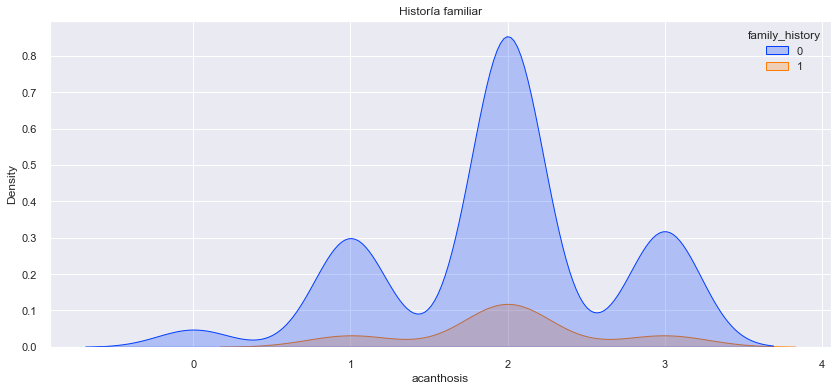

In [47]:
plt.figure(figsize=(14,6))
plt.title('Historía familiar')
# sns.kdeplot(data = derma_data, x= 'erythema', hue='family_history', shade=True)
# sns.kdeplot(data = derma_data, x= 'acanthosis', hue='family_history', shade=True)
# sns.kdeplot(data = derma_data, x= 'inflammatory_monoluclear_inflitrate', hue='family_history', shade=True)
# sns.kdeplot(data = derma_data, x= 'scaling', hue='family_history', shade=True)
# sns.kdeplot(data = derma_data, x= 'definite_borders', hue='family_history', shade=True)
# sns.kdeplot(data = derma_data, x= 'parakeratosis', hue='family_history', shade=True)
fig.show()

Vertificando si la historia familiar está presente por clase de Dermatosis Eritematoescamosas.

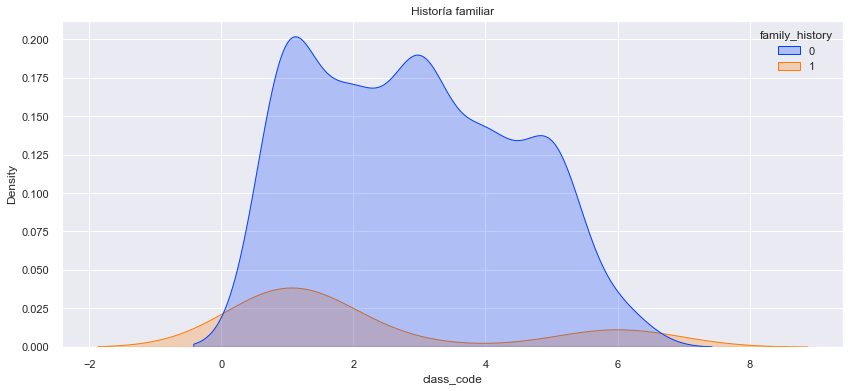

In [62]:
plt.figure(figsize=(14,6))
plt.title('Historía familiar')
sns.kdeplot(data = derma_data, x= 'class_code', hue='family_history', shade=True)
fig.show()

Las clases que tienen una ligera relación con la herencia familiar son:

In [60]:
# psoriasis (1) family_history
# seboreic dermatitis
# cronic dermatitis
# pityriasis rosea
# pityriasis rubra pilaris (6) family_history

der_hight_weight = derma_data.loc[:,["family_history","clase","Age"]]

# family_history 0 & 1
# der_hight_weight[der_hight_weight.clase =="psoriasis"].groupby(["clase","Age"]).sum()

# family_history only 1
der_hight_weight[(der_hight_weight.clase =="psoriasis") & (der_hight_weight.family_history !=0)].\
                    groupby(["clase","Age"]).sum().sort_values(by="family_history", ascending = False)

family_history
clase     Age                
psoriasis 62                2
          55                2
          27                2
          50                2
          35                2
          42                2
          8                 1
          40                1
          60                1
          57                1
          52                1
          48                1
          47                1
          46                1
          39                1
          9                 1
          38                1
          36                1
          33                1
          30                1
          25                1
          20                1
          19                1
          18                1
          10                1
          75                1

estudio

In [154]:
# derma_data[derma_data['Age']!= '?']['Age'].astype(int)
# derma_data[derma_data['Age']=='35']
# derma_data.groupby('Age')['Age'].size()

In [97]:
# [i for i in derma_data['Age'] if i == '?']
# derma_data['Age']
# mean_age
# derma_data['Age']=derma_data['Age'].replace('?',mean_age)

In [ ]:
# derma_data.set_index('clase')
# derma_data.set_index('clase').groupby('clase').agg([min,max,np.mean])
# derma_data.set_index('clase')['erythema'].map(lambda x: 0 == x).sum()
# derma_data.set_index('clase').loc[:,'saw-tooth_appearance_of_retes'].map(lambda x: 3 == x).sum()
# derma_data.groupby(['clase','Age']).count()
# derma_data.groupby(['clase','Age']).agg([min,max])
# derma_data.groupby(['clase','Age']).size()

In [ ]:
# sns.barplot(data = b, x = 'Total', y = 'Age', hue = 'clase')#choose
# sns.histplot(data = b, x = 'clase')
# sns.scatterplot(data = b, x = 'Age', y = 'Total')
# sns.scatterplot(data = b, x = 'Age', y = 'Total', hue = 'clase')
# sns.scatterplot(x = b['Age'], y = b['Total'], hue = b['clase'])
# sns.swarmplot(x = b['clase'], y = b['Total'])
# sns.regplot(x = b['Age'], y = b['Total'])
# sns.regplot(x = b['Total'], y = b['Age'])
# sns.jointplot(x = b['Age'], y = b['Total'], kind ='kde')
# sns.catplot(x = 'Total', y = 'Age', hue = 'clase',kind = 'box',data = b)
# b[b['clase'] == "pityriasis rubra pilaris"]
# plt.figure(figsize=(12,6))
# sns.lmplot(x = 'Age', y = 'Total', hue = 'clase',data = b) #choose
# sns.catplot( x = 'Total', y = 'Age', hue = 'clase', kind = 'point',data = b) #choose
# sns.catplot(x = 'Age', y = 'Total', row = 'clase',kind = 'box',
#                   orient = 'h', height=1.5,aspect=4,data = b) #choose

In [ ]:
# derma_data['eosinophils_in_the_infiltrate'].value_counts()
# a = derma_data.iloc[:,11].value_counts()
# b = derma_data.iloc[:,12].value_counts()
# c = derma_data.iloc[:,13].value_counts()
# d = pd.DataFrame({"a":a,"b":b,"c":c})
# d

# def recorre():
#     a = []
#     for x in range(11,33):
#         a.append(derma_data.iloc[:,x].value_counts())
#     return a   
# pesos = pd.DataFrame(recorre())
# pesos[0] = pesos[0].astype(int)
# pesos[1] = pesos[1].astype(int)
# pesos[2] = pesos[2].astype(int)
# pesos[3] = pesos[3].fillna(0).astype(int)
# pesos.sort_values(by=[3], ascending=False)
# pesos.sort_values(by=[2], ascending=False)
# pesos.sort_values(by=[0], ascending=False)

anexar

In [ ]:
# pesos_clinical / pesos_hispathological
# pesos_clinical.loc['definite_borders',:]
# pesos_hispathological.loc['acanthosis',:]
# sns.scatterplot(data = b, x = 'Age', y = 'Total')


# plt.figure(figsize=(8,8))
# sns.regplot(x = a["definite_borders"], y = a["acanthosis"])
# sns.scatterplot(x = a["definite_borders"], y = a["acanthosis"])
# sns.regplot(x = a["definite_borders"], y = a["inflammatory_monoluclear_inflitrate"])
# sns.regplot(x = a["itching"], y = a["exocytosis"])
# sns.regplot(x = a["itching"], y = a["band-like_infiltrate"],marker='*')
# sns.lineplot(x = a["itching"], y = a["band-like_infiltrate"],marker='*')

# Relación media positiva
# sns.lmplot(x = "definite_borders", y = "acanthosis", hue='weight', data = a)
# sns.lmplot(x = "definite_borders", y = "inflammatory_monoluclear_inflitrate", hue='weight', data = a)

# sns.lmplot(x = "itching", y = "exocytosis", hue='weight', data = a)
# sns.lmplot(x = "itching", y = "band-like_infiltrate", hue='weight', data = a)

# sns.lmplot(x = "scaling", y = "inflammatory_monoluclear_inflitrate", hue='weight', data = a)

# sns.regplot(x = a["definite_borders"], y = a["exocytosis"])
# sns.lmplot(x = "definite_borders", y = "exocytosis", hue='weight', data = a)

# Relación media negativa
# sns.regplot(x = a["scaling"], y = a["band-like_infiltrate"])
# sns.lmplot(x = "scaling", y = "band-like_infiltrate", hue='weight', data = a)

# sns.regplot(x = a["itching"], y = a["acanthosis"])
# sns.lmplot(x = "itching", y = "acanthosis", hue='weight', data = a)

# sns.regplot(x = derma_cor["itching"], y = derma_cor["acanthosis"], data = derma_cor)
# sns.regplot(x = derma_data["itching"], y = derma_data["acanthosis"])
# sns.regplot(x = a[3], y = a[0])
# sns.lmplot(x = "", y = "", hue='weight', data = a)


In [ ]:
# # derma_data[derma_data.iloc[:,3]!=0]
# def frec_rel ():
#     frec = []
#     clases = pd.Series(derma_data["clase"].value_counts().keys())
#     for i in range(0,6):
#         for j in range(0,32):
#             frec.append(len(derma_data[(derma_data.iloc[:,j]!=0) & (derma_data.clase==clases[i])]))
#             print(j,clases[i])
#     return frec
# # frec_rel()

In [ ]:
# derma_data.loc[:,['oral_mucosal_involvement','focal_hypergranulosis']][derma_data['oral_mucosal_involvement'] == derma_data['focal_hypergranulosis']]
# derma_data.loc[:,['knee_elbow_involvement','clubbing_of_the_rete_ridges']][derma_data['knee_elbow_involvement'] == derma_data['clubbing_of_the_rete_ridges']]
# derma_data.loc[:,['follicular_papules','follicular_horn_plug']][derma_data['follicular_papules'] == derma_data['follicular_horn_plug']]
# derma_data.loc[:,['follicular_papules','band-like_infiltrate']][derma_data['follicular_papules'] == derma_data["band-like_infiltrate"]]